In [21]:
%matplotlib inline

import itertools
from collections import Counter

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


import pymongo

In [16]:
client = pymongo.MongoClient()
fields = ['title', 'year', 'type', 'metascore', 'genre']
cursor = client.movies_db.movies_collection.find({})

# Get all movies from the collection
movies_df = pd.DataFrame(list(cursor), columns=fields)

In [17]:
from IPython.display import display, HTML
display(movies_df.head())
display(movies_df.tail())

,title,year,type,metascore,genre
0,Carmencita,1894,movie,N/A,"Documentary, Short"
1,Le clown et ses chiens,1892,movie,N/A,"Animation, Short"
2,Pauvre Pierrot,1892,movie,N/A,"Animation, Comedy, Short"
3,Un bon bock,1892,movie,N/A,"Animation, Short"
4,Blacksmith Scene,1893,movie,N/A,Short


,title,year,type,metascore,genre
734294,,,,,
734295,,,,,
734296,,,,,
734297,The Angel Louise,1955,episode,N/A,Adventure
734298,New Kids on the Block,1999,episode,N/A,"Action, Crime, Drama"


In [19]:
# Clean up data frame

# Remove movies with no specified year
movies_df = movies_df[movies_df['year'] != '']
movies_df = movies_df[movies_df['title'] != '']

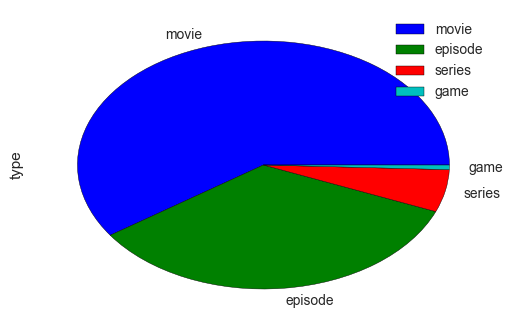

In [22]:
# What types of movies do we have
movies_df['type'].unique()

type_series = movies_df['type']
type_series = type_series.replace('', 'unknown')

type_series.value_counts().plot(kind='pie', legend='True')

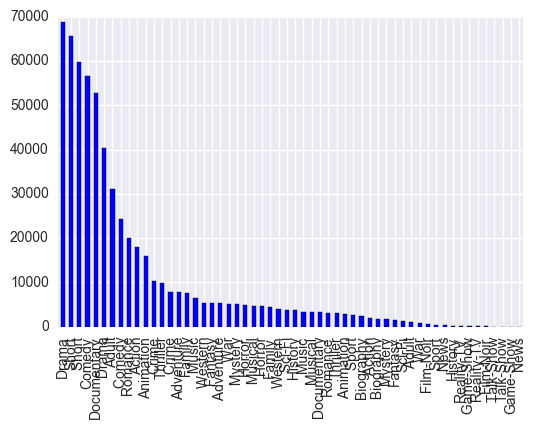

In [24]:
movies = movies_df[movies_df['type'] == 'movie']

movies_with_genres = movies.copy()[(movies['genre'] != 'N/A') & (movies['genre'] != '')]


df = movies_with_genres[['year', 'genre']]

genres = pd.DataFrame(df.genre.str.split(',').tolist(), index=df.year).stack()
genres = genres.reset_index()[[0, 'year']] # var1 variable is currently labeled 0
genres.columns = ['genre', 'date'] # renaming var1
genres

genres['genre'].value_counts().plot(kind='bar')

In [25]:
# Convert strings date column to time series
genres['date'] = pd.to_datetime(genres['date'])
# genres.set_index(['date'], inplace=True)
genres.tail()

,genre,date
595641,Drama,1955-01-01
595642,Drama,1961-01-01
595643,Adventure,1987-01-01
595644,Crime,1987-01-01
595645,Drama,1987-01-01


In [26]:
genres_by_decades = genres.groupby('date')['genre'].value_counts().unstack().resample('10AS', how='count')
t = genres_by_decades.transpose()
n_largest = t['1888-01-01 '].nlargest(5)
n_largest

genre
 Short         8
Documentary    8
Short          8
 Comedy        6
 Sport         5
Name: 1888-01-01 00:00:00, dtype: int64

In [29]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.charts import Bar
# from collections import Counter

output_notebook()

df = n_largest.to_frame()
df = df.reset_index()
df.columns = ['genre', 'count']


bar = Bar(df, values='count', stack='genre')

handle = show(bar)
# push_notebook(handle=handle)

# df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
# df2.plot.bar
# np.random.rand(10, 4)

Loading BokehJS ...

In [ ]:
df[['genre', 'count']].plot